>by Nassar Nour

# Documentation for the Model and Code

## Motivation and State of the Art for Image Classification in Classes (book, nobook) & Explainable AI

### Motivation

1. **Automation and Efficiency Improvement:**
   The volume of images in digital libraries, social media, and other platforms is constantly growing. There is an increasing need for automated systems to categorize these images. Classifying images into categories such as "book" and "no book" can relieve librarians, archivists, and content managers, improving the efficiency of content organization.

2. **Enhanced User Experience:**
   For users of digital libraries or book retail platforms, a system that automatically identifies images as book covers can significantly facilitate the search for and discovery of books. This contributes to a more intuitive and user-friendly environment.

3. **Safety and Moderation:**
   In social media or educational platforms, systems that automatically classify content can help filter inappropriate or irrelevant content, thereby improving the safety and quality of the provided content.

4. **Explainable AI (XAI):**
   The explainability of AI models is crucial, especially when deployed in safety-critical or ethically sensitive areas. By integrating explainable AI techniques such as LIME or Grad-CAM, developers and end-users can understand why a model makes a certain decision. This increases trust in the system and facilitates troubleshooting and improvement of the models.

### State of the Art

1. **Convolutional Neural Networks (CNNs):**
   - **Description:** CNNs are the standard for image classification tasks. They are effective in extracting features from images through their hierarchical structure and use of convolution operations.
   - **Strengths:** High accuracy and efficiency in processing and classifying images.
   - **Examples:** ResNet, EfficientNet, DenseNet.

2. **Vision Transformers (ViTs):**
   - **Description:** Vision Transformers apply the Transformer model, developed in the NLP domain, to image data. They break images into smaller patches and treat them as a sequence of tokens.
   - **Strengths:** Excellent performance on large datasets and the ability to capture global context information.
   - **Examples:** ViT, DeiT (Data-efficient Image Transformers).

3. **Explainable AI (XAI):**
   - **LIME (Local Interpretable Model-agnostic Explanations):** LIME explains model predictions by creating local perturbations of the input data and examining how these changes affect model predictions.
   - **Grad-CAM (Gradient-weighted Class Activation Mapping):** Grad-CAM visualizes which parts of an image contributed to a specific prediction by calculating the gradients of the target class with respect to the last convolutional layer.

### Application in Our Model/Code

- **Classification of Images as Book or No Book:**
  Our model likely utilizes CNN architectures to extract features from input images and make predictions based on these features.

- **Integration of XAI Techniques:**
  In our code, we have used LIME to explain model predictions and visualize which areas of the image positively or negatively contribute to the classification.

### Conclusion

Combining modern image classification techniques and explainable AI methods ensures that not only accurate predictions are made but also that these predictions are understandable and trustworthy. This is particularly important in applications where model decisions have significant impacts on users or processes. Our project, which is based on classifying images into "book" and "no book" and integrates explainable AI techniques like LIME, exemplifies the current state of the art and the efforts to make AI models more transparent and user-friendly.


## Model Architectures and Algorithms:
### Convolutional Neural Network (CNN):
Purpose: Designed for image classification tasks, CNNs excel in learning spatial hierarchies of features directly from pixel data.
Architecture: Typically consists of convolutional layers followed by pooling layers for feature extraction, and fully connected layers for classification.
### Hyperparameters:
- Learning Rate: Crucial for controlling the step size in gradient descent.
- Momentum: Is a parameter optimization technique that accelerates gradient descent by adding a fraction of the previous update to the current update
- Loss Function: Determines the discrepancy between predicted and actual values.
- Metrics: Assesses model performance during training and evaluation.

### Training Configurations:
####  1. Adam Optimizer (Adaptive Moment Estimation):
- Purpose: Combines ideas from RMSProp and Momentum to optimize gradient descent.
- Key Hyperparameters: Learning Rate, Automatically adjusted based on past gradients.
- Training Dynamics:
    - Loss Function: Binary Crossentropy (suitable for binary classification tasks).
    - Metrics: Accuracy (measuring classification performance).

#### 2. SGD Optimizer (Stochastic Gradient Descent):
- Purpose: A classic optimizer that updates weights based on the gradient of the entire dataset.
- Key Hyperparameters:
    - Learning Rate: Set to 0.001 (controls the step size in gradient descent).
    - Momentum: Set to 0.9 (helps accelerate SGD in the relevant direction).
- Training Dynamics:
    - Loss Function: Binary Crossentropy (standard for binary classification tasks).
    - Metrics: Accuracy (evaluates the correctness of the model's predictions).

## Install dependencies

In [1]:
!pip install tensorflow opencv-python matplotlib
!pip install numpy
!pip install pandas
!pip install opencv-python matplotlib
!pip install scikit-learn
!pip install saliency
!pip install tf-explain
!pip install lime==0.2.0.1


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import dependencies
___

`cv2` is needed for image preprocessing and augmentation while `matplotlib` is useful for actually showing the images and plotting the performance of the neural network.

The `Sequential` API is used to build the model. This is appropriate if there is one data input and one output.

Different layers like `Conv2D, MaxPooling2D, Dense, Flatten, Dropout` are also necessary:
- `Dense` is a fully connected layer
- `Flatten` reduces the channels or kernels from the `Conv2D` layer for the `Dense` layer so that there is only one output at the end
- `Dropout` is typically used for regularization

In [31]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import saliency.core as saliency
import PIL.Image
import cv2

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.optimizers import SGD, Adam
from tf_explain.core.grad_cam import GradCAM

In [33]:
import os

Use `os` to see all image folders that make up the data.

In [34]:
os.listdir('data')

['book', 'nobook']

Restrict tensorflow from using all the available VRAM on the gpu(s) to prevent an "Out of memory" error:
- List the available gpus
- Set the memory growth

In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [9]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    print(gpu)

## Loading the data
___
The book dataset was too massive compared to the nobook dataset, so we had to massively decrease the size of books.

Sorting out of images was done manually by the following criteria:
- images that belonged to a movie were not included in the dataset
- images which showed the classified item in the background were also left out
- images opened digitally on a computer screen with other information on the screen were left out
- images showing multiple covers were sorted out
- images shown on top of a T-shirt with writing on it were excluded from the dataset
- images with books in the background (or other media) were sorted out


Build a data pipeline by creating a dataset from the "data" directory with Keras. This is actually a generator and will also resize and batch the images.

In [35]:
data = tf.keras.utils.image_dataset_from_directory('data', image_size=(256, 256), batch_size=32)

Found 4021 files belonging to 2 classes.


## Preprocessing the data
___

### Zweck
Die `data_augmentation` Pipeline wendet sequenzielle Transformationen auf Eingabedaten an, um deren Vielfalt zu erhöhen und die Robustheit sowie die Generalisierungsfähigkeit von Modellen, insbesondere in Deep-Learning-Anwendungen, zu verbessern.

In [36]:
data_augmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.2),
])

Declare a data iterator to access the data pipeline.

In [37]:
data_iterator = data.as_numpy_iterator()

It is possible to get consecutive batches with the `next()` method.

A batch has a length of two since there are the images and the labels. The first part represents the images as numpy arrays.

The `shape()` method shows the batch size.

In [38]:
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

The second part of a batch represents the labels.

In [39]:
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

Plot some images with the labels to see which label (class) is assigned to which type of image.

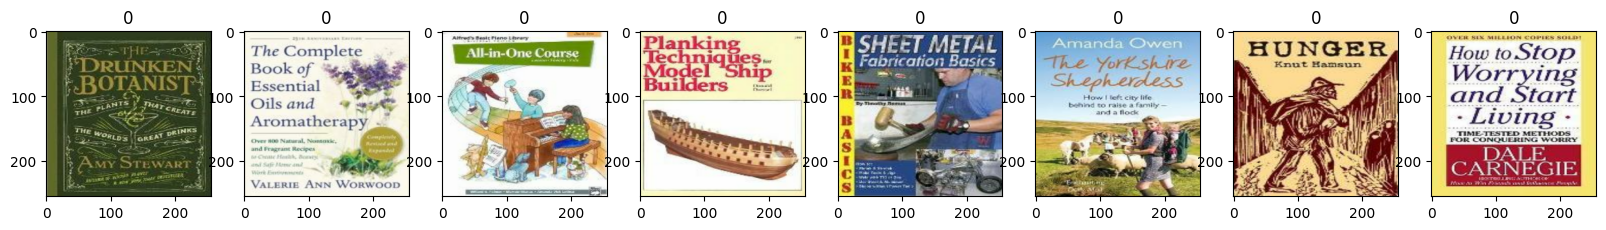

In [40]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

The images (x) from a batch will be transformed by the `map()` method in pipeline. They are divided by 255 so that they are scaled between 0 and 1. y are the labels.

In [41]:
data = data.map(lambda x,y: (data_augmentation(x)/255, y))

In [42]:
len(data) # number of batches

126

The following is an example of a single batch.

In [43]:
data.as_numpy_iterator().next()

(array([[[[0.6530079 , 0.17347483, 0.10155749],
          [0.64621395, 0.15225509, 0.09296838],
          [0.6546492 , 0.14709324, 0.10208979],
          ...,
          [0.7087838 , 0.13608427, 0.17376156],
          [0.7042826 , 0.13329622, 0.16802073],
          [0.69692796, 0.1327444 , 0.16143638]],
 
         [[0.7554002 , 0.296367  , 0.21188597],
          [0.6851999 , 0.20617308, 0.13508631],
          [0.65564215, 0.16132176, 0.10448957],
          ...,
          [0.700959  , 0.14044084, 0.17550072],
          [0.69358855, 0.13695654, 0.16938537],
          [0.6836032 , 0.13311157, 0.16156389]],
 
         [[0.8775233 , 0.43929568, 0.34183148],
          [0.7743852 , 0.3120074 , 0.22810899],
          [0.6904627 , 0.21066579, 0.14215378],
          ...,
          [0.696328  , 0.14158027, 0.17143282],
          [0.68782616, 0.13773277, 0.16660005],
          [0.67670214, 0.13323684, 0.16027723]],
 
         ...,
 
         [[0.24302149, 0.17893964, 0.15475418],
          [0.38569

### Splitting the data

Different partitions (training, validation and test) are needed for validating the data and making sure that the model has not overfit.

The training set is going to be 70 percent of the data. Training data will be used to train the model.

Validation data will be used to evaluate the model while it is learning.

Test data is not going to be exposed to the model until the final evaluation stage.

In [44]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [45]:
train_size # number of training batches

88

The `take()` method allocates batches to a partition. `skip()` skips the batches that are already allocated. This way the partitions can be established.

In [60]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [62]:
print(train)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


## The neural network
___
### Network architecture

In the following the model architecture is built with the `Sequential` API and the different layers are added.

In [24]:
model = Sequential()

Strides (horizontal, vertical) are the distance between two consecutive receptive fields.

The first layer needs an input (images will be 256 pixels high, 256 pixels wide and 3 channels deep). It has 32 filters that are 3 by 3 to scan over the image. The stride is 1 so the filter will move one pixel each time. Changing these hyperparameters influences the model performance. A "Rectified Linear Unit" activation function is applied to the layer. With this any negative values in the output are converted to 0 and the positive values are preserved.

`MaxPooling2D()` takes the maximum value of a certain region after the activation function to condense the information.

The `Dropout()` layer is a regularization technique used to prevent overfitting. During each training iteration, 50% of the neurons in the previous layer will be randomly set to zero (dropped out). This forces the network to not rely too heavily on any individual neuron, thus improving generalization.

`Flatten()` condenses the channel value resulting from the number of filters of the last convolutional layer to pass a single value to `Dense()`.

The first `Dense()` layer has 128 neurons. Finally, the last layer is a single `Dense()` layer with a single output which will be 0 or 1 because of "Sigmoid".

A "Sigmoid" activation function reshapes the output of a layer by taking any output and converting it between a range of 0 and 1. We chose this activation function because the task at hand is a binary classification task.

The reason we chose such a high number of filters is that we wanted to be able to recognize more features and reach a higher accuracy. Since we have so many filters there is a higher chance of overfitting. Therefore, we added two `Dropout` layers at the end. They are placed at the higher layers to prevent overfitting and not at the lower layers because then important information could be lost.

In [25]:
model.add(Conv2D(32, (3,3),strides=(1,1), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3),strides=(1,1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3),strides=(1,1), activation='relu', name="conv3"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.5)) #Dropout Layer (0.2,0.35,0.5)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2)) #Dropout Layer (0.2,0.35,0.5)
model.add(Dense(1, activation='sigmoid', name="last_dense"))

C:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We used the adam optimizer and the binary cross entropy because it is currently the state of the art for binary image classification.

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    58,982,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ last_dense (Dense)              │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,076,673 (225.36 MB)

 Trainable params: 59,076,673 (225.36 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
logdir='logs'

Declare a callback for logging in the "logs" directory. This is useful for monitoring the performance of the neural network.

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

The model is trained with the `fit()` method. It takes in the training data, the number of epochs so how long the training will last where one epoch is a run over the entire training dataset, the validation data to see how well the model is performing and the defined callbacks.

`early_stopping` is a callback class so that the training of the model is interrupted if the value of the validation loss does not change by a certain value for ten epochs. This is used in the training to stop unnecessary training.

In [30]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001, restore_best_weights=True)

We are using the training partition of the dataset, a duration of 160 epochs, the validation partition and the `early_stopping` callback to train the model. 

In [31]:
hist = model.fit(train, epochs=160, validation_data=val, callbacks=[early_stopping])

Epoch 1/160
88/88 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.7444 - loss: 1.1477 - val_accuracy: 0.7987 - val_loss: 0.4936
Epoch 2/160
88/88 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.7986 - loss: 0.4908 - val_accuracy: 0.8075 - val_loss: 0.4601
Epoch 3/160
88/88 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.7950 - loss: 0.4814 - val_accuracy: 0.7912 - val_loss: 0.5010
Epoch 4/160
88/88 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.8069 - loss: 0.4642 - val_accuracy: 0.8087 - val_loss: 0.4453
Epoch 5/160
88/88 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.8127 - loss: 0.4457 - val_accuracy: 0.8263 - val_loss: 0.4068
Epoch 6/160
88/88 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.8198 - loss: 0.4221 - val_accuracy: 0.8250 - val_loss: 0.4172
Epoch 7/160
88/88 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.8446 - loss: 0.3870 - val_accuracy: 0.8462 - val_loss: 0.3632
Epoch 8/160
88/88 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.8538 - loss: 0.3470 - val_accuracy: 0.8512 - v

See the values for the training and validation accuracy and loss below.

In [32]:
print(hist.history)

{'accuracy': [0.7681108117103577, 0.7858664989471436, 0.78515625, 0.7915483117103577, 0.8053977489471436, 0.8153409361839294, 0.8220880627632141, 0.8497869372367859, 0.8668323755264282, 0.8572443127632141, 0.8622159361839294, 0.8639914989471436, 0.8689630627632141, 0.8735795617103577, 0.8718039989471436, 0.8686079382896423, 0.8838778138160706, 0.87890625, 0.8884943127632141, 0.8924005627632141, 0.8884943127632141, 0.8860085010528564, 0.8874289989471436, 0.8927556872367859, 0.9073153138160706, 0.8938210010528564, 0.8959516882896423, 0.9048295617103577, 0.9037641882896423, 0.8888494372367859, 0.9083806872367859, 0.9115766882896423, 0.9119318127632141, 0.9048295617103577, 0.9108664989471436, 0.9080255627632141, 0.9048295617103577, 0.9098011255264282, 0.9229403138160706, 0.9176136255264282, 0.9183238744735718, 0.9225852489471436, 0.9204545617103577, 0.9112215638160706, 0.9140625, 0.9225852489471436, 0.9232954382896423, 0.9229403138160706, 0.9254261255264282, 0.9176136255264282, 0.927201688

### Performance measure

If the training loss goes down and the validation loss rises up that might mean overfitting (apply regularization or data or change some data).

If the training loss does not decrease the model is not able to learn (tune the hyperparameters like the learning rate).

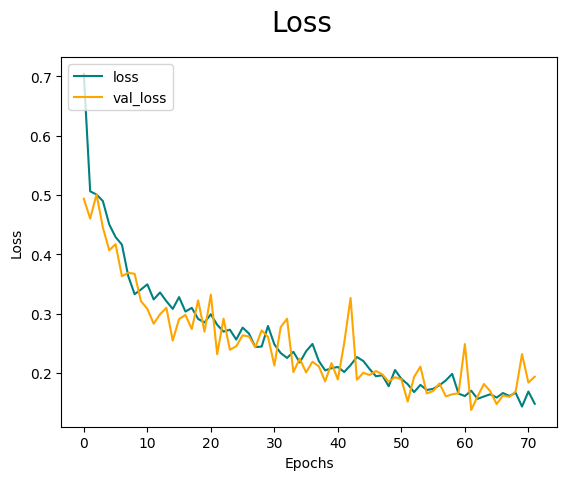

In [33]:
fig_loss = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig_loss.suptitle('Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

The training loss falls rapidly at the beginning and then continues to go down at a slower pace. The validation loss while also decreasing over time fluctuates much more than the training loss.

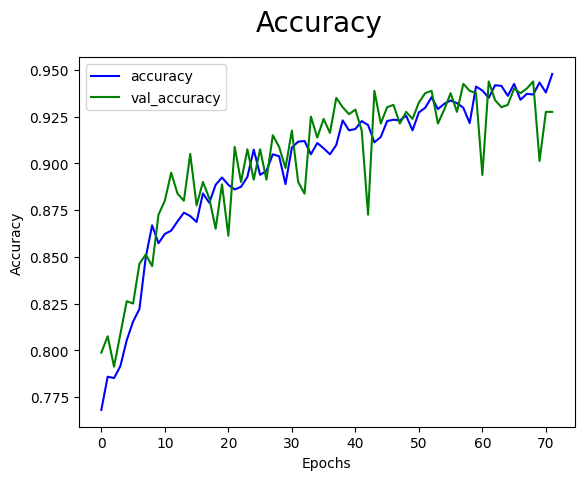

In [34]:
fig_accuracy = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
fig_accuracy.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

The training accuracy rises dramatically during the first 20 epochs and then continues to go up further. In comparison, the validation accuracy also has a sharp increase at the beginning. It is more erratic than the training accuracy though it also goes up.

## Performance evaluation
___

The performance of the model is evaluated with the `evaluate()` method on the test data which was previously unknown to the model.

In [75]:
from sklearn.metrics import precision_score, recall_score
import numpy as np

test_loss, test_accuracy = model.evaluate(test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 24s 257ms/step - accuracy: 0.9444 - loss: 0.1280
Test Loss: 0.17316408455371857
Test Accuracy: 0.9296875


By saving the model, you ensure that all the learned parameters, architecture, and training configurations are preserved and can be easily loaded for future use.

In [36]:
model.save('bookCNN.keras')

- load_model('bookCNN.keras'): Loads a saved Keras model from the file bookCNN.keras.
- model.inputs: Displays the model's input tensor(s), including shape and data type.
- model.outputs: Displays the model's output tensor(s), including shape and data type.

In [77]:
import tensorflow as tf
import numpy as np
import PIL.Image
from skimage.io import imread
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from lime import lime_image

model = tf.keras.models.load_model('bookCNN.keras')
print(model.inputs)
print(model.outputs)

[<KerasTensor shape=(None, 256, 256, 3), dtype=float32, sparse=False, name=input_layer_1>]
[<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_135>]


This function takes images as input and predicts outputs using a pre-loaded Keras model (model).

In [155]:
def predict_fn(images):
    # Ensure the images have the correct shape
    images = np.array(images)
    if len(images.shape) == 3:
        images = np.expand_dims(images, axis=0)
    pred = model.predict(images)
    return pred

def create_lime(image):
    # Initialize the LIME explainer
    explainer = lime_image.LimeImageExplainer()
    
    # Explain the prediction on the resized image
    explanation = explainer.explain_instance(image, 
                                             predict_fn, 
                                             top_labels=1, 
                                             hide_color=0, 
                                             num_samples=10)
    
    # Get the explanation for the top class including both positive and negative influences
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                                 positive_only=False, 
                                                 num_features=15, 
                                                 hide_rest=False)
    
    # Display the image with the LIME explanation for both positive and negative influences
    plt.imshow(mark_boundaries(image, mask))
    plt.axis('off')
    plt.show()
    
    # Visualize the positive and negative regions separately with different colors
    positive_mask = (mask == 1)
    negative_mask = (mask == -1)
    
    # Create a new image to overlay positive and negative regions with different colors
    overlay_image = image.copy()
    overlay_image[positive_mask] = [0, 1, 0]  # Green for positive influences
    overlay_image[negative_mask] = [1, 0, 0]  # Red for negative influences
    
    plt.imshow(overlay_image)
    plt.axis('off')
    plt.title('Positive (Green) and Negative (Red) Influences')
    plt.show()

def predict_cv2(image_path):
    img = cv2.imread(image_path)
    img_res = tf.image.resize(img, (256,256))
    img_res = img_res.numpy().astype(int)
    prediction = model.predict(np.expand_dims(img_res/255, 0))
    prediction
    if prediction > 0.5: 
        print(f'Predicted class is NoBook [{prediction}]')
    else:
        print(f'Predicted class is Book [{prediction}]')

- explainer.explain_instance(image, predict_fn, top_labels=1, hide_color=0, num_samples=4000):
Generates an explanation (explanation) for the prediction of the model (predict_fn) on the provided image.
    - image: The image for which the explanation is to be generated.
    - predict_fn: Function that predicts outputs based on input images.
    - top_labels=1: Number of top labels to explain (in this case, explaining the top predicted label).
    - hide_color=0: Color to use for pixels that are hidden in the explanation (here, no pixels are hidden).
    - num_samples=4000: Number of samples to use for generating the explanation.


- explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=15, hide_rest=False): Retrieves an image (temp) and a mask (mask) that highlight regions of the image relevant to the top predicted label.
    - explanation.top_labels[0]: Retrieves the top label for which the explanation is generated.
    - positive_only=False: Includes both positive and negative influences in the explanation.
    - num_features=15: Number of top features (regions) to include in the explanation visualization.
    - hide_rest=False: Shows all other parts of the image that are not highlighted.

- Loading: Loads an image from a specified file path.
- Normalization: Converts the image data into a format suitable for processing by machine learning models (pixel values between 0 and 1).
- Visualization: Displays the loaded image for inspection or verification.

- predict_cv2 function:
    - Reading and Preprocessing: The image is read, resized, and converted to the correct format for the model.
    - Normalization: The pixel values are normalized to match the model.
    - Batch Dimension: The image is expanded to have a batch dimension as the model expects input in batches.
    - Prediction: The model makes a prediction, and based on the probability, the predicted class is determined and printed.


## Testing and LIME

Predicting class of random images from the internet and using LIME to understand why the model chose to predict this class. We are using the `predict_cv2` function to get the prediction for the picture. Then to display which pixels were most influential for the decision we load the picture, create a numpy array, normalize it and then we can use our `create_lime` function to create the LIME mask (because cv2 and keras load the pictures differently we use cv2 for the prediction and keras for LIME because if you use the cv2 the LIME mask is not clearly visible).

**LIME theory:**
It seems like the model often prioritizes the top of an image to make its prediction. Also, we assume that if there are faces in an image it can mislead the convolutional neural network into thinking that it is a book cover.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class is NoBook [[[0.99964243]]]


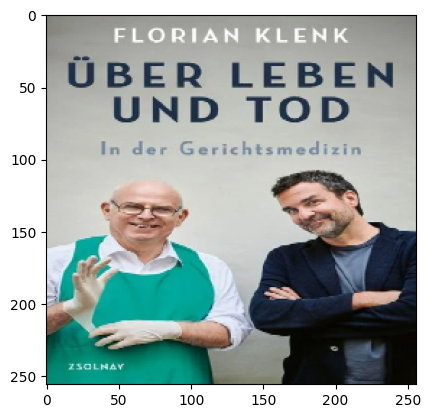

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


100%|██████████| 10/10 [00:00<00:00, 92.51it/s]


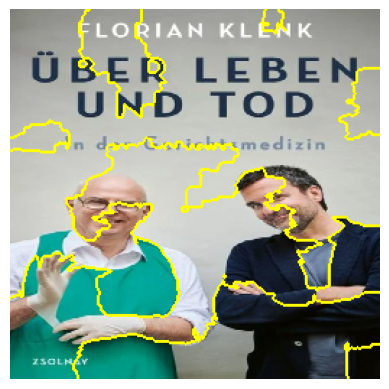

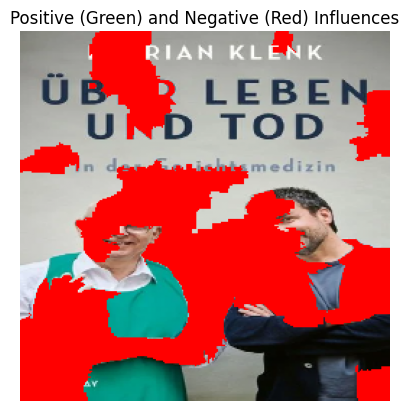

In [156]:
predict_cv2('test_picture_book.png')
# Load the image
image = tf.keras.utils.load_img('test_picture_book.png', target_size=(256, 256))
image = np.array(image) / 255.0
plt.imshow(image)
plt.show()
create_lime(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class is Book [[[0.13772762]]]


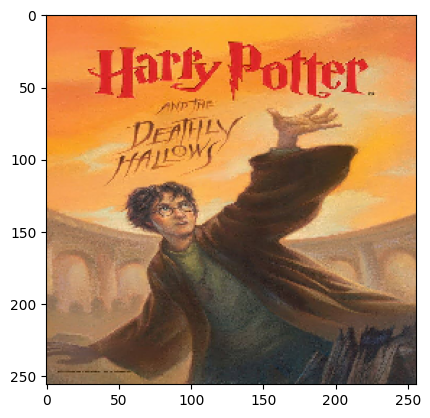

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


100%|██████████| 10/10 [00:00<00:00, 93.36it/s]


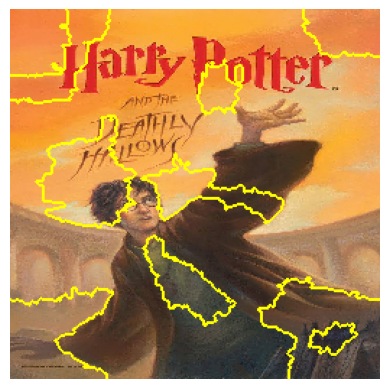

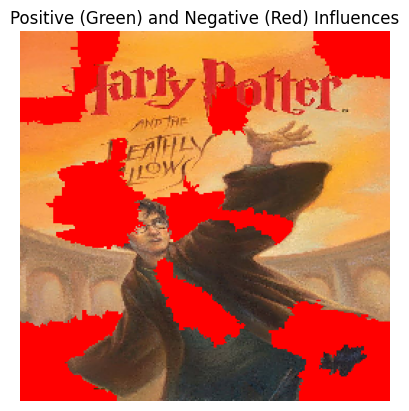

In [157]:
predict_cv2('test_picture_book2.jpg')
# Load the image
image = tf.keras.utils.load_img('test_picture_book2.jpg', target_size=(256, 256))
image = np.array(image) / 255.0
plt.imshow(image)
plt.show()
create_lime(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class is NoBook [[[1.]]]


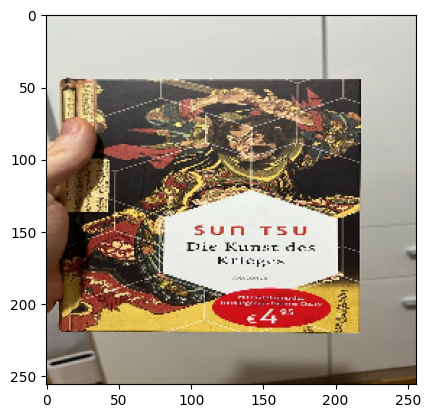

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


100%|██████████| 10/10 [00:00<00:00, 90.99it/s]


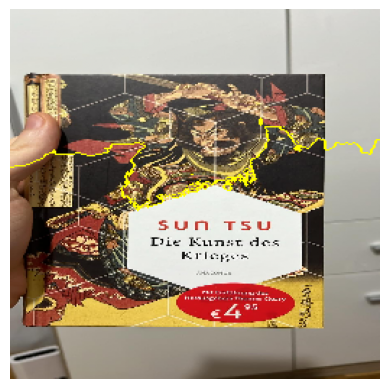

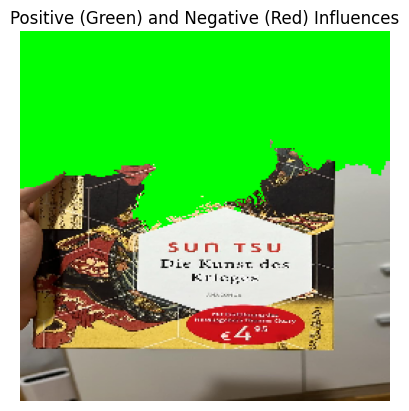

In [158]:
predict_cv2('test_book_front.jpg')
# Load the image
image = tf.keras.utils.load_img('test_book_front.jpg', target_size=(256, 256))
image = np.array(image) / 255.0
plt.imshow(image)
plt.show()
create_lime(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class is NoBook [[[1.]]]


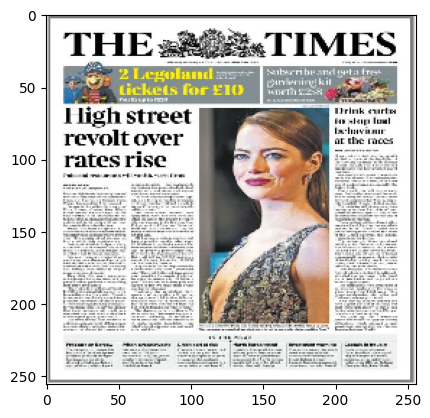

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


100%|██████████| 10/10 [00:00<00:00, 90.76it/s]


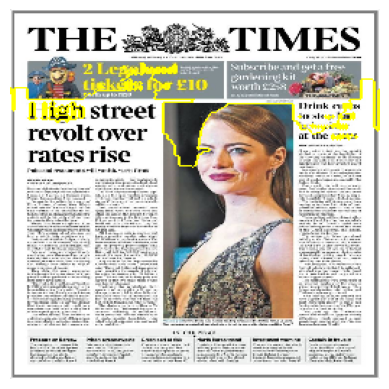

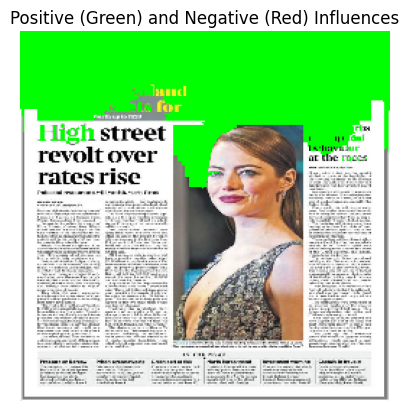

In [160]:
predict_cv2('test_picture_newspaper.jpg')
# Load the image
image = tf.keras.utils.load_img('test_picture_newspaper.jpg', target_size=(256, 256))
image = np.array(image) / 255.0
plt.imshow(image)
plt.show()
create_lime(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class is NoBook [[[1.]]]


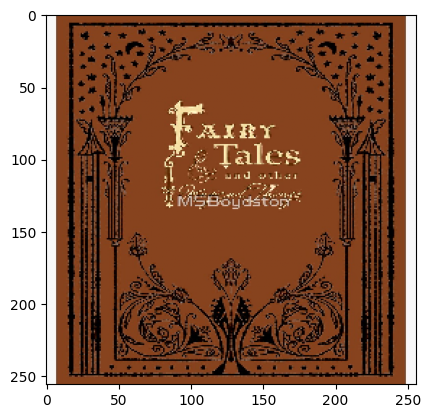

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


100%|██████████| 10/10 [00:00<00:00, 93.62it/s]


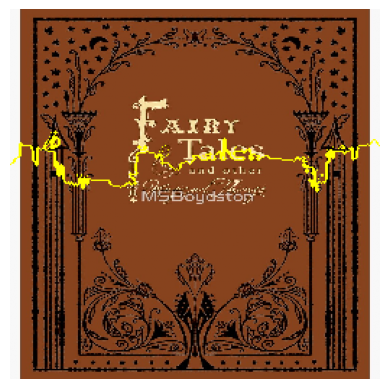

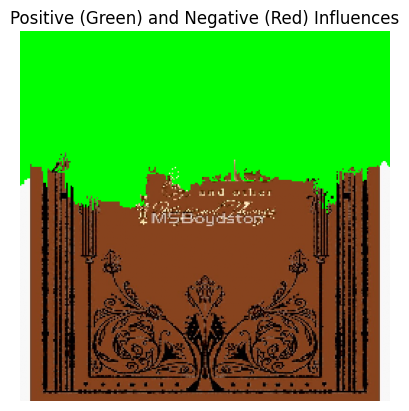

In [161]:
predict_cv2('test_picture_book3.jpg')
# Load the image
image = tf.keras.utils.load_img('test_picture_book3.jpg', target_size=(256, 256))
image = np.array(image) / 255.0
plt.imshow(image)
plt.show()
create_lime(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class is Book [[[0.14997631]]]


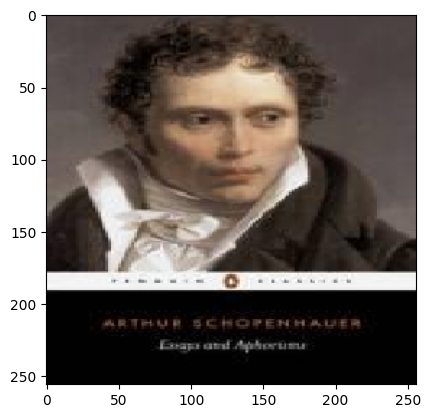

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


100%|██████████| 10/10 [00:00<00:00, 94.44it/s]


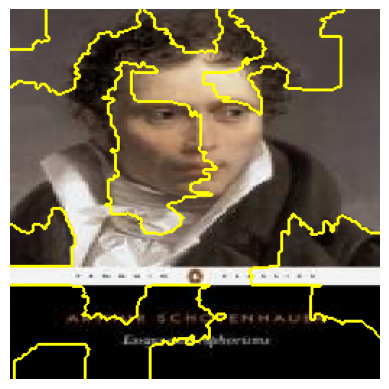

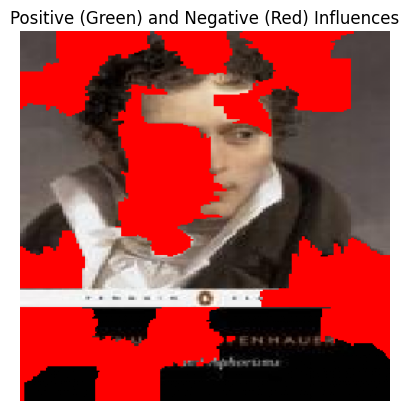

In [162]:
predict_cv2('data/book/archive/book-covers/Poetry-Drama/0000698.jpg')
# Load the image
image = tf.keras.utils.load_img('data/book/archive/book-covers/Poetry-Drama/0000698.jpg', target_size=(256, 256))
image = np.array(image) / 255.0
plt.imshow(image)
plt.show()
create_lime(image)

# Results

Before this notebook we had two different models which are mentioned and compared in the following section. Our conclusion of this comparison was the foundation for the improved notebook.

## Analysation of 160 Epoch Training with Adam Optimizer
### Loss
![](https://i.imgur.com/GmSO9q5.png)
- Training Loss (cyan line): The training loss consistently decreases over time, starting relatively high and approaching near zero by the end of the training. This indicates that the model is effectively minimizing the loss on the training data.
- Validation Loss (orange line): The validation loss decreases initially but begins to fluctuate significantly as training progresses. After about 40 epochs, the validation loss starts to increase and becomes highly erratic, showing a clear divergence from the training loss.

### Accuracy
![](https://i.imgur.com/raihj6Z.png)
- Training Accuracy (blue line): The training accuracy starts relatively low and increases steadily, achieving an accuracy close to 0.95 towards the end of the training. This suggests that the model is learning the training data well over time.
- Validation Accuracy (green line): The validation accuracy shows a lot more fluctuation compared to the training accuracy.
While it generally improves over the first 40 epochs, reaching a peak close to 0.90, it then exhibits high variability and does not show a consistent improvement, hovering around 0.85 towards the end.
## Analysation of 160 Epoch Training with SGD Optimizer
### Loss
![](https://i.imgur.com/1J0BgfL.png)
- Training Loss: The training loss decreases consistently throughout training, which is a good indication that the model is learning and improving.
- Validation Loss: The validation loss also decreases initially but starts to plateau after some epochs, indicating that the model might be overfitting or reaching its optimal performance on the validation set.

### Accuracy
![](https://i.imgur.com/x3w7HlX.png)
- Training Accuracy: The training accuracy steadily increases over epochs, reaching up to 91.76%.
- Validation Accuracy: Validation accuracy also increases but with some fluctuations, peaking at around 88.87%.

## Discussion/Comparison
### Loss Stability:
- SGD: While SGD showed a more stable validation loss towards the end of training, indicating less overfitting, it also converged slower compared to Adam.
- Adam: Adam, on the other hand, exhibited a more erratic validation loss behaviour, suggesting potential overfitting or sensitivity to learning rate adjustments.

### Training Efficiency:
- SGD: Despite slower convergence, SGD managed to achieve reasonable training and validation losses, although it showed signs of slower learning.
- Adam: Adam demonstrated faster convergence in training loss but struggled with validation loss stability, potentially indicating a need for regularization or adjustments in learning rate decay.

In conclusion, while Adam showed faster convergence and higher accuracy in training, it also exhibited more instability in validation loss compared to SGD.

# Improved Results

Since our last conclusion several improvements have been made:

- Architecture changes (before and after):
    - ![before](https://imgur.com/AkwRDOd)
    - ![after](https://imgur.com/6GwZGpa)

- early_stopping callback added

| Modell   | Architektur                                                                                                              | Trainierbare Parameter | Trainierbare Parameter (MB) | Nicht-trainierbare Parameter | Nicht-trainierbare Parameter (MB) | Epochs | Optimizer             | Callbacks                                                                                    |
| -------- | ------------------------------------------------------------------------------------------------------------------------ | ---------------------- | --------------------------- | ---------------------------- | --------------------------------- | ------ | --------------------- | -------------------------------------------------------------------------------------------- |
| Modell 1 | Conv2D(16), MaxPooling, Dropout, Conv2D(32), MaxPooling, Conv2D(64), MaxPooling, Flatten, Dense(128), Dense(1)           | 7,396,641              | 28.22 MB                    | 0                            | 0.00 B                            | 160    | Adam                  | tensorboard_callback                                                                         |
| Modell 2 | Conv2D(16), MaxPooling, Dropout, Conv2D(32), MaxPooling, Conv2D(64), MaxPooling, Flatten, Dense(128), Dense(1)           | 7,396,641              | 28.22 MB                    | 0                            | 0.00 B                            | 160    | SGD(learning_rate=0.001, momentum=0.9) | tensorboard_callback                                                                   |
| Modell 3 | Conv2D(32), MaxPooling, Conv2D(64), MaxPooling, Conv2D(128), MaxPooling, Flatten, Dropout, Dense(512), Dropout, Dense(1) | 59,076,673             | 225.36 MB                   | 0                            | 0.00 B                            | 160    | Adam                  | EarlyStopping (monitor='val_loss', patience=10, min_delta=0.0001, restore_best_weights=True) |


| Modell   | max Accuracy (Training) | min Loss (Training) | max Accuracy (Validation) | min Loss (Validation) | min Loss (Test) | Accuracy (Test)
|----------|---------------------|-----------------|-----------------------|-------------------|-------------|----------------
| Modell 1 | 96.4%               | 0.0915          | 91.0%                 | 0.2211            | 0.4852287   | 86.7%
| Modell 2 | 91.7%               | 0.2116          | 88.4%                 | 0.2948            | 0.3555143   | 85.1%
| Modell 3 | 94.7%               | 0.1436          | 94.3%                 | 0.1380            | 0.1731640   | 92.9%